# California House Pricing Prediction

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Dataset Import

In [2]:
dataset = fetch_california_housing()

In [3]:
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [4]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
data['Price'] = dataset.target

In [6]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## EDA

In [8]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [9]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

<Figure size 1080x1440 with 0 Axes>

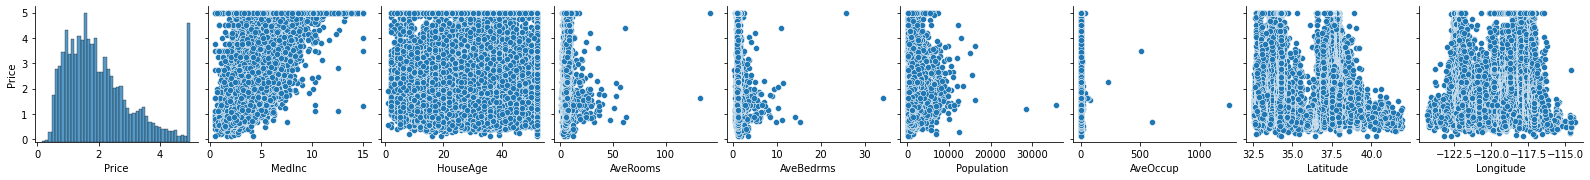

In [10]:
plt.figure(figsize=[15,20])
sns.pairplot(data, x_vars=['Price', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 
             y_vars=['Price'], diag_kind='hist')
plt.rcParams["axes.labelsize"] = 12
plt.show()

In [ ]:
sns.pairplot(data, corner=True, kind='reg', plot_kws={'line_kws':{'color':'red'}})

## Data - Features & Target

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

## Model Building

### Multiple Linear Regression

In [ ]:
np.array([X.iloc[0, :]]).shape

In [ ]:
# Multiple Linear Regression with all features included

ml_regr = LinearRegression()
ml_regr.fit(X, y)
y_pred = ml_regr.predict(np.expand_dims(X.iloc[1, :], axis=0))

print('Predicted Price: ', y_pred[0])
print('Actual Price: ', y[1])



# score = ml_regr.score(X_test, y_test)
# print('Test R-Squared: ', score)
score_train = ml_regr.score(X, y)
print('Train R-Squared: ', score_train)

In [ ]:
features_ml_regr = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']
X_features = X[features_ml_regr]

In [ ]:
# Multiple Linear Regression with one of the features with multi-colinearity excluded

X_features = X[features_ml_regr]
ml_regr = LinearRegression()
ml_regr.fit(X_features, y)
y_pred = ml_regr.predict(np.expand_dims(X_features.iloc[1, :], axis=0))

print('Predicted Price: ', y_pred[0])
print('Actual Price: ', y[1])



# score = ml_regr.score(X_test, y_test)
# print('Test R-Squared: ', score)
score_train = ml_regr.score(X_features, y)
print('Train R-Squared: ', score_train)

### Decision Tree Regression

In [ ]:
# Decision Tree Regression with all features included
dt_regr = DecisionTreeRegressor(random_state=42)

dt_regr.fit(X, y)
y_pred = dt_regr.predict(np.expand_dims(X.iloc[1, :], axis=0))

print('Predicted Price: ', y_pred[0])
print('Actual Price: ', y[1])
score_train = dt_regr.score(X, y)
print('Train R-Squared: ', score_train)

In [ ]:
# Decision Tree Regression with one of the features with multi-colinearity excluded
dt_regr = DecisionTreeRegressor(random_state=42)

dt_regr.fit(X_features, y)
y_pred = dt_regr.predict(np.expand_dims(X_features.iloc[1, :], axis=0))

print('Predicted Price: ', y_pred[0])
print('Actual Price: ', y[1])
score_train = dt_regr.score(X_features, y)
print('Train R-Squared: ', score_train)

### Random Forest Regression

In [ ]:
# Random Forest Regression with all features included
rf_regr = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regr.fit(X, y)
y_pred = rf_regr.predict(np.expand_dims(X.iloc[1, :], axis=0))

print('Predicted Price: ', y_pred[0])
print('Actual Price: ', y[1])
score_train = rf_regr.score(X, y)
print('Train R-Squared: ', score_train)

In [ ]:
# Random Forest Regression with one of the features with multi-colinearity excluded
rf_regr = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regr.fit(X_features, y)
y_pred = rf_regr.predict(np.expand_dims(X_features.iloc[1, :], axis=0))

print('Predicted Price: ', y_pred[0])
print('Actual Price: ', y[1])
score_train = rf_regr.score(X_features, y)
print('Train R-Squared: ', score_train)

### Support Vector Regression

In [ ]:
#Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_X.fit_transform(X)
y_train_scaled = sc_y.fit_transform(np.expand_dims(y, axis=0))

# X_test_scaled = sc_X.transform(X_test)
# y_test_scaled = sc_y.transform(np.expand_dims(y_test, axis=0))

#### Linear Kernel

In [ ]:
# Support Vector Regression with linear kernel and all features included
svr_regr = SVR(kernel='linear')
svr_regr.fit(X, y)

y_pred = svr_regr.predict(np.expand_dims(X.iloc[1, :], axis=0))

print('Predicted Price: ', sc_y.inverse_transform(y_pred[0]))
print('Actual Price: ', y[1])
score_train = svr_regr.score(X_train_scaled, y_train_scaled)
print('Train R-Squared: ', score_train)

# score = svr_regr.score(X_test, y_test)
# print('Test R-Squared: ', score)
# score_train = svr_regr.score(X_train, y_train)
# print('Train R-Squared: ', score_train)

#### Non-Linear Kernel

In [ ]:
# Support Vector Regression with non-linear kernel and all features included
svr_nl_regr = SVR(kernel='rbf')
svr_nl_regr.fit(X, y)

y_pred = svr_nl_regr.predict(np.expand_dims(X.iloc[1, :], axis=0))

print('Predicted Price: ', sc_y.inverse_transform(y_pred[0]))
print('Actual Price: ', y[1])
score_train = svr_nl_regr.score(X_train_scaled, y_train_scaled)
print('Train R-Squared: ', score_train)

# score = svr_regr.score(X_test, y_test)
# print('Test R-Squared: ', score)
# score_train = svr_regr.score(X_train, y_train)
# print('Train R-Squared: ', score_train)